# Transfer learning

Dado que los problemas a resolver suelen ser en determinadas, o muchas, ocasiones genericos una mejor opción es "traer" un modelo ya entrenado y utilzar ese... ¿para qué hacer lo ya realizado? si ya esta hecho...

Por ejemplo, supongamos que tenemos una red entrada con miles de clases como posibles salidas e imagenes...:

<center><img src="img/ejemplo_transfer_learning.png"></center>

Si bien no estoy en condiciones de hablar de la empleabilidad de DL y ML, lo cierto es que la mayoria de los problemas ya fueron solucionados y el código referente a modelos, los set de datos y parametros incluso son altamente reutilizados y llevados a modelos "creados".

El ejemplo del vídeo nos lleva al siguiente podcast para ejemplificar quizas esto...: https://www.youtube.com/watch?v=Bi7f1JSSlh8

# Modelos ya disponibles por pyTorch

En la documentación oficial de pyTorch ya hay modelos disponibles: https://docs.pytorch.org/vision/main/models.html

<center><img src="img/modelos_ya_entrenados.png"></center>

Tenemos también el siguiente repositorio: https://github.com/rwightman

Hugging face: https://huggingface.co/models

Paperswithcode: https://github.com/paperswithcode

Teniendo a mano estos recursos usaremos algunos para:

1. Crearemos algun/os model/os y set de datos.
2. Importaremos el entrenamiento.
3. Adaptaremos este a nuestro modelo.
4. Evaluaremos metricas

In [1]:
import torch
import torchvision
import os
import zipfile
import requests
from pathlib import Path

# print(torch.__version__)
# print(torchvision.__version__)

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"El directorio {image_path} ya existe, no hace falta crealo...")
else:
    print(f"El directorio {image_path} no existe, creandolo...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_stake_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
        print("Descargando...")
        f.write(request.content) 

    with zipfile.ZipFile(data_path / "pizza_steak_sushi", "r") as zip_ref:
        print("Descomprimiendo...")
        zip_ref.extractall(image_path)

    os.remove(data_path / "pizza_stake_sushi.zip ")

El directorio data\pizza_steak_sushi ya existe, no hace falta crealo...


In [2]:
# Instaciamos los directorios correspondientes

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [3]:
from torchvision import transforms
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])

manual_transforms = transforms.Compose([
    transforms.Resize((244, 244)),
    transforms.ToTensor(),
    normalize]
    )

In [4]:
# Datastes y dataloaders importando los modulos con las funciones ya creadas.

from going_modular.going_modular import data_setup

train_data_loader, test_data_loader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                 test_dir = test_dir,
                                                                                 transform=manual_transforms,
                                                                                 batch_size=32)

train_data_loader, test_data_loader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x282c8625d30>,
 ['pizza', 'steak', 'sushi'])

In [5]:
weigths = torchvision.models.EfficientNet_B0_Weights.DEFAULT # DEFAULT = Mejor modelo disponible
weigths

EfficientNet_B0_Weights.IMAGENET1K_V1

In [6]:
auto_transforms = weigths.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

Modelos: 

         - https://docs.pytorch.org/vision/main/models.html#classification (Documentación oficial de pyTorch)
         - https://pypi.org/project/timm/ (Librerias extra, hay literalmente miles, es una cosa de locos)
         - https://huggingface.co/ (HugginFace, sitio mencionado arriba)
         - https://paperswithcode.com/sota (Papersiwthcode, repositorio mencionado arriba)

Aunque, como es el caso de casi todo el desarrollo IA, debemos probar, probar y probar...
Debemos considerar:
- Velocidad
- Tamaño
- Rendimiento

Un articlo interesante y a la vez algo alarmador sobre el uso y desarrollo de IA es el siguiente: https://www.cs.utexas.edu/~eunsol/courses/data/bitter_lesson.pdf, es bastante fuerte, hay que estar dispuesto a leerlo en tercera persona.

# Instanciar un modelo ya entrenado: EFFICIENTNET_B0

https://docs.pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b0 

In [7]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # DEFAULT = Mejor modelo disponible

model = torchvision.models.efficientnet_b0(weights=weights)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

Podrémos importar un modelo ya creado y usar nuevos valores númericos según vayan surgiendo o usar nuestro modelo  y esta asignarle los valores numericos correspondientes a los atributos de uno previo similar.

In [8]:
from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # batch_size, colores, heigth, weigth
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [9]:
for param in model.features.parameters():
    # print(param)
    param.requires_grad = False

In [10]:
from torch import nn

torch.manual_seed(42)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280,
    out_features=len(class_names)))

In [11]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

Entrenaremos nuestro modelo

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
from going_modular.going_modular import engine

# Aleatoriedad
torch.manual_seed(42)

# Inicializamos timer
from timeit import default_timer as timer
start_time = timer()

# Configurar entrenamiento y guardar modelo
results = engine.train(model=model,
                       train_dataloader=train_data_loader,
                       test_dataloader=test_data_loader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device="cpu")

# Finalizamos timer
end_time = timer()
print(f"Tiempo total de entrenamiento: {end_time-start_time:.3f} segundos")

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\marti\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
 20%|██        | 1/5 [00:40<02:40, 40.21s/it]

Epoch: 1 | train_loss: 0.1739 | train_acc: 0.9336 | test_loss: 0.3303 | test_acc: 0.8769


 40%|████      | 2/5 [01:15<01:51, 37.23s/it]

Epoch: 2 | train_loss: 0.1126 | train_acc: 0.9688 | test_loss: 0.3808 | test_acc: 0.8873


 60%|██████    | 3/5 [01:55<01:17, 38.54s/it]

Epoch: 3 | train_loss: 0.0666 | train_acc: 0.9844 | test_loss: 0.3186 | test_acc: 0.9072


 80%|████████  | 4/5 [02:32<00:37, 37.78s/it]

Epoch: 4 | train_loss: 0.0603 | train_acc: 0.9961 | test_loss: 0.3446 | test_acc: 0.8665


100%|██████████| 5/5 [03:09<00:00, 37.96s/it]

Epoch: 5 | train_loss: 0.0699 | train_acc: 1.0000 | test_loss: 0.3288 | test_acc: 0.8873
Tiempo total de entrenamiento: 189.781 segundos


In [14]:
# results

Evaluamos nuestro modelo exportado mediante graficos, es por lo visto bastante eficiente...

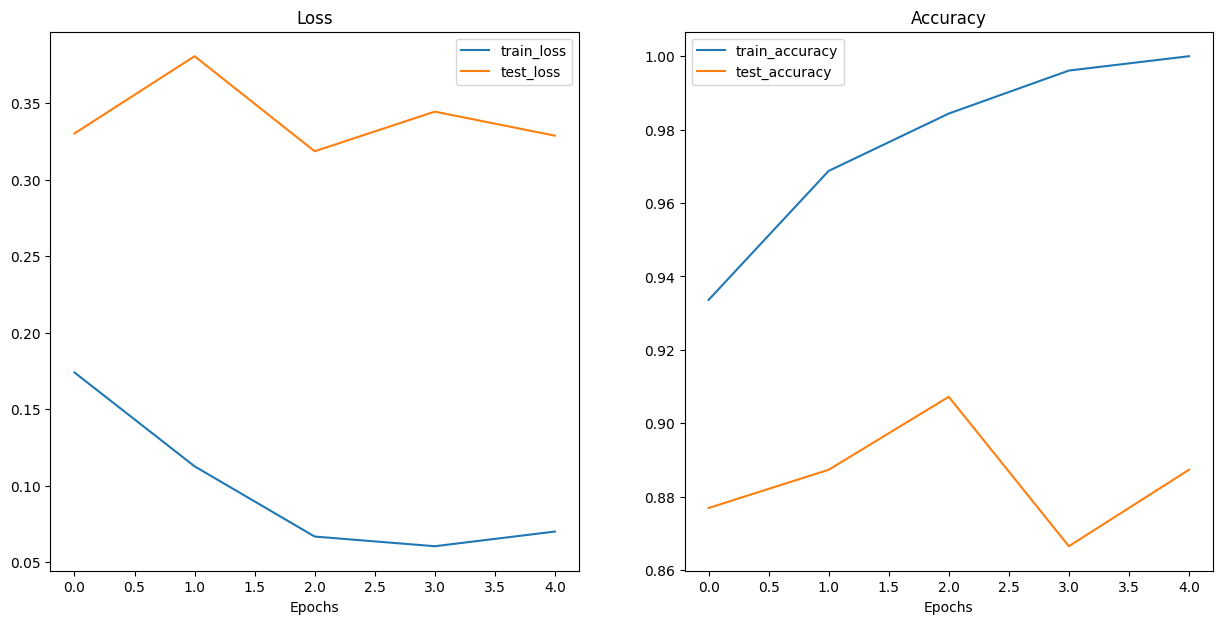

In [17]:
try: 
    from helper_functions import plot_loss_curves
except:
    print("No se pudo encontrar helper_functios.py, descargando...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

plot_loss_curves(results)

Dado mi hardware supongo la curva no quedo como esta en el curso, sin embargo la perdida deberá ser siempre menor a medida que pasan las epocas y la exactitud mayor.

Material interesante: https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like

# Relizaremos predicciones con imagenes de nuestro set de datos.

Para realizar predicciones con imagenes de nuestro set de datos debemos tener en cuenta:

- Misma forma: las imágenes deben tener la misma forma que el modelo que fue entrenado.
- Mismo tipo de dato: los datos personalizados deben estar en el mismo tipo de dato que los datos de entrenamiento.
- Misma transformación: Si has transformado tus datos personalizados, idealmente deberías transformar los datos de prueba de la misma manera.

Para que esto se cumpla crearémos una función tal como la que esta aquí: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
Esta función realizará las siguientes instrucciones:

1. Tomará un modelo entrenado, una lista de clases, una ruta de la imagen a evaluar, su tamaño y si es necesario transformará la imagen.
2. Abrir la imagen con ´PIL.Image.Open()´.
3. Creará un ´transform´ si no existe
4. Pondrá el modelo en modo model.eval() para evitar cambios de contexto.
5. Tranformará la imagen ya abierta en caso de que sea necesario.
6. Creará una predicción sobre la imagen pasada al modelo.
7. Convertira las salidas en probabilidades predictivas usando softmax()
8. Visualizaremos la imagen con matplotlib y pondrémos como titulo la predicción junto a su probabilidad.

In [29]:
from typing import List, Tuple

from PIL import Image

from torchvision import transforms

import matplotlib.pyplot as plt

# 1.
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None):
    # 2.
    img = Image.open(image_path)

    # 3.
    if transform is not None:
        image_transform = transform
    else:
        image_transform =  transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
    # 4. 
    model.eval()
    with torch.inference_mode():
        # 5.
        transformed_image = image_transform(img).unsqueeze(dim=0)

        # 6.
        target_image_pred = model(transformed_image)
    
    # 7.
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8.

    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicción: {class_names[target_image_pred_label]} | Probabilidad: {target_image_pred_probs.max():.3f}")
    plt.axis("off")
    
       

In [20]:
# test_dir

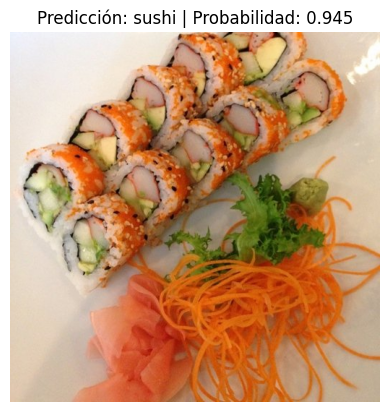

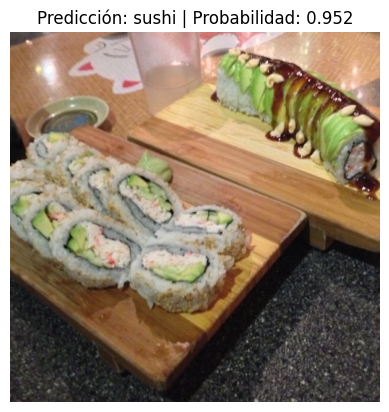

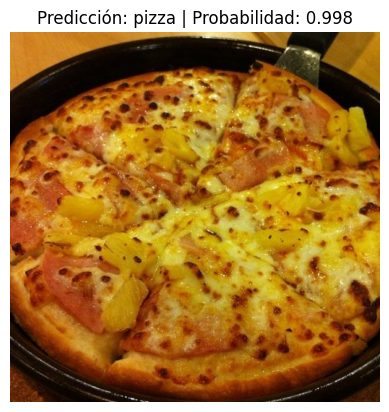

In [31]:
# Lista de rutas aleratorias con imagenes de prueba:

import random
num_image_to_plot = 3 # A gusto
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_image_to_plot)
# Predicciones y gráficar:

for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))